# Image Manipulations and Image Spaces

# Imports

In [1]:
import numpy as np
from PIL import Image

# Imports:
from skimage.color import rgb2yuv, yuv2rgb, rgb2lab, lab2rgb, rgb2hsv, hsv2rgb
from skimage.exposure import equalize_hist, equalize_adapthist
from skimage import io

import numpy as np
import pandas as pd
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
import os
import math


# Warm up

In [3]:
# Read an image
image = Image.open("4.1.06.tiff")

# Show the image
image.show()


In [4]:
# Transform the image to numpy array to manipulate it
image_array = np.array(image)

# Inspect the image array
print(f"Shape: {image_array.shape}")
print(f"Red channel:\n{image_array[:, :, 0]}")
print(f"Green channel:\n{image_array[:, :, 1]}")
print(f"Blue channel:\n{image_array[:, :, 2]}")

Shape: (256, 256, 3)
Red channel:
[[233 202 205 ... 233 235 239]
 [230 203 206 ... 232 234 235]
 [230 200 200 ... 232 233 235]
 ...
 [ 48  81  84 ...  75  68  84]
 [ 64 155 115 ...  81  83  85]
 [  0   0   0 ...   0   0   0]]
Green channel:
[[  0 217 218 ... 229 229 229]
 [217 217 217 ... 227 227 229]
 [217 217 216 ... 228 228 229]
 ...
 [ 43  58  43 ...  40  34  40]
 [ 58 155  99 ...  51  45  55]
 [  0   0   0 ...   0   0   0]]
Blue channel:
[[246 221 220 ... 227 227 226]
 [237 221 220 ... 227 225 228]
 [236 221 220 ... 227 227 226]
 ...
 [ 97  70  76 ...  72  72  81]
 [ 94 135  89 ...  84  74  80]
 [  0   0   0 ...   0   0   0]]


In [13]:
# Manipulation example: make the image darker
image_array_v1 = (image_array * 0.6).astype(np.uint8)
image_v1 = Image.fromarray(image_array_v1)
image_v1.show()

In [ ]:
# Manipulation example: manipulate the red channel
image_array_v2 = image_array[:, :, 0]
image_v2 = Image.fromarray(image_array_v2)
image_v2.show()

# Q: Why is it grey?
# A: Because if only one channel is used, the image is considered to be greyscale.

# Manipulation example: set explicitly green and blue channels to 0
image_array_v2 = image_array.copy()
image_array_v2[:, :, 1] = 0  # Set green channel to 0
image_array_v2[:, :, 2] = 0  # Set blue channel to 0
image_v2 = Image.fromarray(image_array_v2)
image_v2.show() # The image has now only the red channel

In [7]:
# Transform RGB array to Lab array
from skimage.color import rgb2lab, lab2rgb

image_array_lab = rgb2lab(image_array)
# Inspect the image array
print(f"Shape: {image_array_lab.shape}")
print(f"L channel:\n{image_array_lab[:, :, 0]}")
print(f"a channel:\n{image_array_lab[:, :, 1]}")
print(f"b channel:\n{image_array_lab[:, :, 2]}")

# Transform Lab array to RGB array
image_array_rgb = lab2rgb(image_array_lab)

# Inspect the image array
print(f"Shape: {image_array_rgb.shape}")
print(f"Red channel:\n{image_array_rgb[:, :, 0]}")
print(f"Green channel:\n{image_array_rgb[:, :, 1]}")
print(f"Blue channel:\n{image_array_rgb[:, :, 2]}")

# Show the image
image = Image.fromarray((image_array_rgb * 255).astype(np.uint8))
image.show()

Shape: (256, 256, 3)
L channel:
[[56.06815251 85.70649804 86.15053474 ... 91.19291207 91.34603556
  91.63142667]
 [88.23904411 85.77686739 85.96353513 ... 90.61551135 90.71930243
  91.37102671]
 [88.21113414 85.56683406 85.28000986 ... 90.86603634 90.94247013
  91.3211776 ]
 ...
 [20.90022822 27.34665366 24.11179235 ... 21.87751504 19.39562593
  23.66076759]
 [26.51742594 63.4755503  43.19728362 ... 26.03168062 24.35542298
  27.4164282 ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
a channel:
[[93.62288486 -4.2523033  -3.9780591  ...  0.99443885  1.67341931
   2.86650061]
 [ 8.01890711 -3.92501161 -3.12997968 ...  1.68553016  2.01711271
   1.8468912 ]
 [ 7.83365831 -4.90474217 -4.5822508  ...  1.17023227  1.50912564
   1.50066387]
 ...
 [18.27126423 12.37713207 24.22905097 ... 21.93389944 23.14911905
  27.02166832]
 [11.83917891 -3.61124745  4.6495671  ... 19.85473825 22.23999884
  17.95949597]
 [ 0.          0.          0.         ...  0.          0.
   0.

In [5]:
# Transform RGB to HSV
from skimage.color import rgb2hsv, hsv2rgb

image_array_hsv = rgb2hsv(image_array)
# Inspect the image array
print(f"Shape: {image_array_hsv.shape}")
print(f"H channel:\n{image_array_hsv[:, :, 0]}")
print(f"S channel:\n{image_array_hsv[:, :, 1]}")
print(f"V channel:\n{image_array_hsv[:, :, 2]}")

# Histogram equalization on the V channel
from skimage.exposure import equalize_hist

image_array_hsv[:, :, 2] = equalize_hist(image_array_hsv[:, :, 2])
print(f"V channel after equalization:\n{image_array_hsv[:, :, 2]}")

# Transform HSV to RGB
image_array_rgb = hsv2rgb(image_array_hsv)

# Show the image
image = Image.fromarray((image_array_rgb * 255).astype(np.uint8))
image.show()

Shape: (256, 256, 3)
H channel:
[[0.82452575 0.53508772 0.52222222 ... 0.05555556 0.04166667 0.03846154]
 [0.775      0.53703704 0.53571429 ... 0.         0.03703704 0.02380952]
 [0.78070175 0.53174603 0.53333333 ... 0.03333333 0.02777778 0.05555556]
 ...
 [0.68209877 0.91304348 0.86585366 ... 0.84761905 0.81578947 0.84469697]
 [0.69444444 0.16666667 0.06410256 ... 0.81818182 0.87280702 0.86111111]
 [0.         0.         0.         ... 0.         0.         0.        ]]
S channel:
[[1.         0.08597285 0.06818182 ... 0.02575107 0.03404255 0.05439331]
 [0.08438819 0.08144796 0.06363636 ... 0.02155172 0.03846154 0.02978723]
 [0.08050847 0.09502262 0.09090909 ... 0.02155172 0.02575107 0.03829787]
 ...
 [0.55670103 0.28395062 0.48809524 ... 0.46666667 0.52777778 0.52380952]
 [0.38297872 0.12903226 0.22608696 ... 0.39285714 0.45783133 0.35294118]
 [0.         0.         0.         ... 0.         0.         0.        ]]
V channel:
[[0.96470588 0.86666667 0.8627451  ... 0.91372549 0.921568

In [ ]:
original_img = Image.fromarray((image_array).astype(np.uint8))
original_img.show()

modified_img = Image.fromarray((image_array_rgb * 255).astype(np.uint8))
modified_img.show()

print(compute_power(original_img))
print(compute_power(modified_img))  


1.7291402637841502
1.5085415925104357


# Utility

In [2]:
"""
Utility to get the paths of all images in a folder
"""

def get_image_paths(images_folder="images"):
    image_paths = []
    for root, dirs, files in os.walk(images_folder):
        for file in files:
            if file.endswith((".png", ".jpg", ".jpeg", ".tiff")):
                relative_path = os.path.join(root, file)
                image_paths.append(relative_path)
    return image_paths

# Get the paths of all images in the folder
image_paths = get_image_paths()
print(image_paths)

['images\\BSR\\BSDS500\\test\\100007.jpg', 'images\\BSR\\BSDS500\\test\\100039.jpg', 'images\\BSR\\BSDS500\\test\\100099.jpg', 'images\\BSR\\BSDS500\\test\\10081.jpg', 'images\\BSR\\BSDS500\\test\\101027.jpg', 'images\\BSR\\BSDS500\\test\\101084.jpg', 'images\\BSR\\BSDS500\\test\\102062.jpg', 'images\\BSR\\BSDS500\\test\\103006.jpg', 'images\\BSR\\BSDS500\\test\\103029.jpg', 'images\\BSR\\BSDS500\\test\\103078.jpg', 'images\\BSR\\BSDS500\\test\\104010.jpg', 'images\\BSR\\BSDS500\\test\\104055.jpg', 'images\\BSR\\BSDS500\\test\\105027.jpg', 'images\\BSR\\BSDS500\\test\\106005.jpg', 'images\\BSR\\BSDS500\\test\\106047.jpg', 'images\\BSR\\BSDS500\\test\\107014.jpg', 'images\\BSR\\BSDS500\\test\\107045.jpg', 'images\\BSR\\BSDS500\\test\\107072.jpg', 'images\\BSR\\BSDS500\\test\\108004.jpg', 'images\\BSR\\BSDS500\\test\\108036.jpg', 'images\\BSR\\BSDS500\\test\\108069.jpg', 'images\\BSR\\BSDS500\\test\\109055.jpg', 'images\\BSR\\BSDS500\\test\\112056.jpg', 'images\\BSR\\BSDS500\\test\\11209

In [ ]:
"""
Utility to find an image in the array of all images.
"""

all_images = get_image_paths()

image_to_find = "images\\BSR\\BSDS500\\train\\55067.jpg"
if image_to_find in all_images:
    print(f"Image {image_to_find} found in all_images at index {all_images.index(image_to_find)}")
else:
    print(f"Image {image_to_find} not found in all_images")

# Compute Power

In [15]:
# Coefficient defines in the slides:
gamma = 0.7755
w_0 = 1.48169521 * 10**(-6)
w_r = 2.13636845 * 10**(-7)
w_g = 1.77746705 * 10**(-7)
w_b = 2.14348309 * 10**(-7)

# First compute the power consumption for each pixel
def compute_power_pixel(r, g, b):
    return w_r * r**gamma + w_g * g**gamma + w_b * b**gamma # From the slides
    
    
def compute_power(img):
    """
    Receive an image as input and return the power consumption based on the formula on the slides
    Works on the R,G,B space of the image
    The image is saved in the variable image_array
    """
    image_array_rgb = np.array(img)
    
        
    # Split the image into the three channels    
    red_channel = image_array_rgb[:, :, 0]
    green_channel = image_array_rgb[:, :, 1]
    blue_channel = image_array_rgb[:, :, 2]
    

    # Apply the function to all pixels
    sum_pixel_power = 0
    height, width = red_channel.shape   # Get the dimensions of the image, assuming all channels have the same dimensions
    for i in range(height):
        for j in range(width):
            power_per_pixel = compute_power_pixel(
                red_channel[i, j], 
                green_channel[i, j], 
                blue_channel[i, j])
            sum_pixel_power += power_per_pixel
    
    power_image = w_0 + sum_pixel_power
    # print('Power consumption of the image: ', power_image)
    return power_image

# compute_power(image_array_rgb)

# Image manipulation strategies

For OLED:
- Dynamic quality setting 
- color selection/transformation

We can act on the colors of pixels

# Reduced brightness of the image and boost non-blue pixels

In [36]:
"""
Approach: Reduce the brightness of the image and boost non-blue pixels

The function reduce_brightness_boost_non_blue receives an image and two factors: brightness_factor and boost_factor. The brightness_factor is used to reduce the brightness of the image. The boost_factor is used to increase the brightness of the non-blue pixels. The function first converts the image from RGB to HSV. Then, it reduces the brightness of the image by multiplying the V channel by the brightness_factor. Next, it identifies the blue pixels in the image by checking if the blue channel is greater than the red and green channels. Finally, it boosts the brightness of the non-blue pixels by multiplying the V channel by the boost_factor. The function returns the modified image in RGB format.
"""

def reduce_brightness_boost_non_blue(img, brightness_factor=0.7, boost_factor=1.3):
    image_array = np.array(img)
    
    if image_array.shape[-1] == 4:  # Check if the image has an alpha channel
        image_array = image_array[..., :3]  # Remove the alpha channel. It is needed in the case of PNG images (screenshots).
    # Convert the image from RGB to HSV
    hsv = rgb2hsv(image_array)
    
    # Reduce the brightness in HSV space
    hsv[:, :, 2] *= brightness_factor
    
    # Identify blue pixels
    blue_pixels = (image_array[:, :, 2] > image_array[:, :, 0]) & (image_array[:, :, 2] > image_array[:, :, 1]) # This approach is used to identify pixels in the image where the blue component is dominant.
    
    # Boost the brightness of non-blue pixels
    # Notes: Without boosting the pixels the power consumption is lower but the image is too dark. The boosting factor is used to increase the brightness of the non-blue pixels but it creates some artifacts.
    hsv[~blue_pixels, 2] = np.clip(hsv[~blue_pixels, 2] * boost_factor, 0, 1)
    
    # Convert the modified HSV image back to RGB
    o_img_array = hsv2rgb(hsv)
    return Image.fromarray((o_img_array * 255).astype(np.uint8))



def test():
    all_images = get_image_paths()
    original_img = Image.open(all_images[0])
    original_img.show()
    o_img = reduce_brightness_boost_non_blue(original_img, 0.8, 1)
    # o_img = Image.fromarray((o_img_array * 255).astype(np.uint8))

    print(compute_power(original_img))
    print(compute_power(o_img))

    o_img.show()

# test()




5.016254929773365
4.208988868584286


## Histogram equalization

In [17]:
"""
Approach: Apply histogram equalization to the image on the V channel of the HSV space
"""


def eq_hist(img):
    original_img_array = np.array(img)
    if original_img_array.shape[-1] == 4:  # Check if the image has an alpha channel
        original_img_array = original_img_array[..., :3]  # Remove the alpha channel. It is needed in the case of PNG images (screenshots).
    
    image_array_hsv = rgb2hsv(original_img_array)
    image_array_hsv[:, :, 2] = equalize_hist(image_array_hsv[:, :, 2])  #  it sometimes yields unnatural looking images.
    image_array_rgb = hsv2rgb(image_array_hsv)
    return Image.fromarray((image_array_rgb * 255).astype(np.uint8))


def test():
    all_images = get_image_paths()
    img = Image.open(all_images[0])
    o_img = eq_hist(img)
    img.show()
    o_img.show()
    
# test()
    

## CLAHE

In [18]:
"""
Approach: CLAHE (Contrast Limited Adaptive Histogram Equalization)
"""

def natural_clahe(img):    
    original_img_array = np.array(img)
    if original_img_array.shape[-1] == 4:  # Check if the image has an alpha channel
        original_img_array = original_img_array[..., :3]  # Remove the alpha channel. It is needed in the case of PNG images (screenshots).
    
    image_array_hsv = rgb2hsv(original_img_array)
    image_array_hsv[:, :, 2] = equalize_adapthist(image_array_hsv[:, :, 2], clip_limit=0.001)  # decrease the clip limit to make the effect less evident
    image_array_rgb = hsv2rgb(image_array_hsv)
    return Image.fromarray((image_array_rgb * 255).astype(np.uint8))


def test():
    all_images = get_image_paths()
    img = Image.open(all_images[0])
    o_img = natural_clahe(img)
    img.show()
    o_img.show()
    
# test()

# Apply trasformation to all the images

In this section some trasformations are applied to the images.  
- The original images are stored into different folders inside `images`.
- The modified images are stored after the trasformations inside folders named after the trasformation applied. The main root of the name is `processed_images_*`.
- The results about power consumptions and distorsion are saved in csv files in the main folder.

In [ ]:
"""
Loop over all images in the images folder and apply the trasformations defined before. 
Save the optimized images to a new folder (named after the parameters used) and compute the power consumption of the optimized images. Write the results to a file.
In this way I can check if the quality of the image is acceptable and if the power consumption is reduced.
"""

# Output file to store the results:
results_file_power = "power_consumption_results.csv"

all_images = get_image_paths()
brightness_range = np.arange(0.5, 0.9, 0.1) # Range of brightness values to test
boost_range = np.arange(1, 1.5, 0.1)  # Range of boost values to test
# Initialize the results file
with open(results_file_power, "w") as file:
    file.write("Image; Original Power; ")
    for brightness in brightness_range:
        for boost in boost_range:
            file.write(f"brightness_{round(brightness,1)}_boost_{round(boost,1)}; ")
    file.write("Histogram Equalization; ")
    file.write("CLAHE")
    file.write("\n")    # End of the header


for image in all_images:
    original_img = Image.open(image)
    

            
    original_power = compute_power(original_img)
    new_line = []
    
    # Apply reduce_brightness_boost_non_blue function with different brightness and boost factors
    for brightness in brightness_range:  # Tune the brightness
        for boost in boost_range:  # Tune the boost factor for the non-blue pixels
            o_img = reduce_brightness_boost_non_blue(original_img, round(brightness,1), round(boost,1))
            # Save the optimized image to a new folder
            new_image_path = image.replace("images", f"processed_images_br{round(brightness,1)}_bo{round(boost,1)}")
            new_image_dir = os.path.dirname(new_image_path)
            if not os.path.exists(new_image_dir):
                os.makedirs(new_image_dir)
            o_img.save(new_image_path)
            # Compute the power consumption of the optimized image
            optimized_power = compute_power(o_img)
            new_line.append(f"{optimized_power}")
            
    # Apply histogram equalization and save the image
    new_image_path = image.replace("images", "processed_images_eq_hist")
    new_image_dir = os.path.dirname(new_image_path)
    eq_img = eq_hist(original_img)
    if not os.path.exists(new_image_dir):
        os.makedirs(new_image_dir)
    eq_img.save(new_image_path)
    optimized_power_hist_eq = compute_power(eq_img)
    
    # Apply CLAHE and save the image
    new_image_path = image.replace("images", "processed_images_CLAHE")
    new_image_dir = os.path.dirname(new_image_path)
    clahe_img = natural_clahe(original_img)
    if not os.path.exists(new_image_dir):
        os.makedirs(new_image_dir)
    clahe_img.save(new_image_path)
    
    optimized_power_clahe = compute_power(clahe_img)
    new_line.append(f"{optimized_power_hist_eq}; {optimized_power_clahe}")
    
    # Write the results to the file
    with open(results_file_power, "a") as file:
        file.write(f"{image}; {original_power}; {'; '.join(new_line)}\n")
            

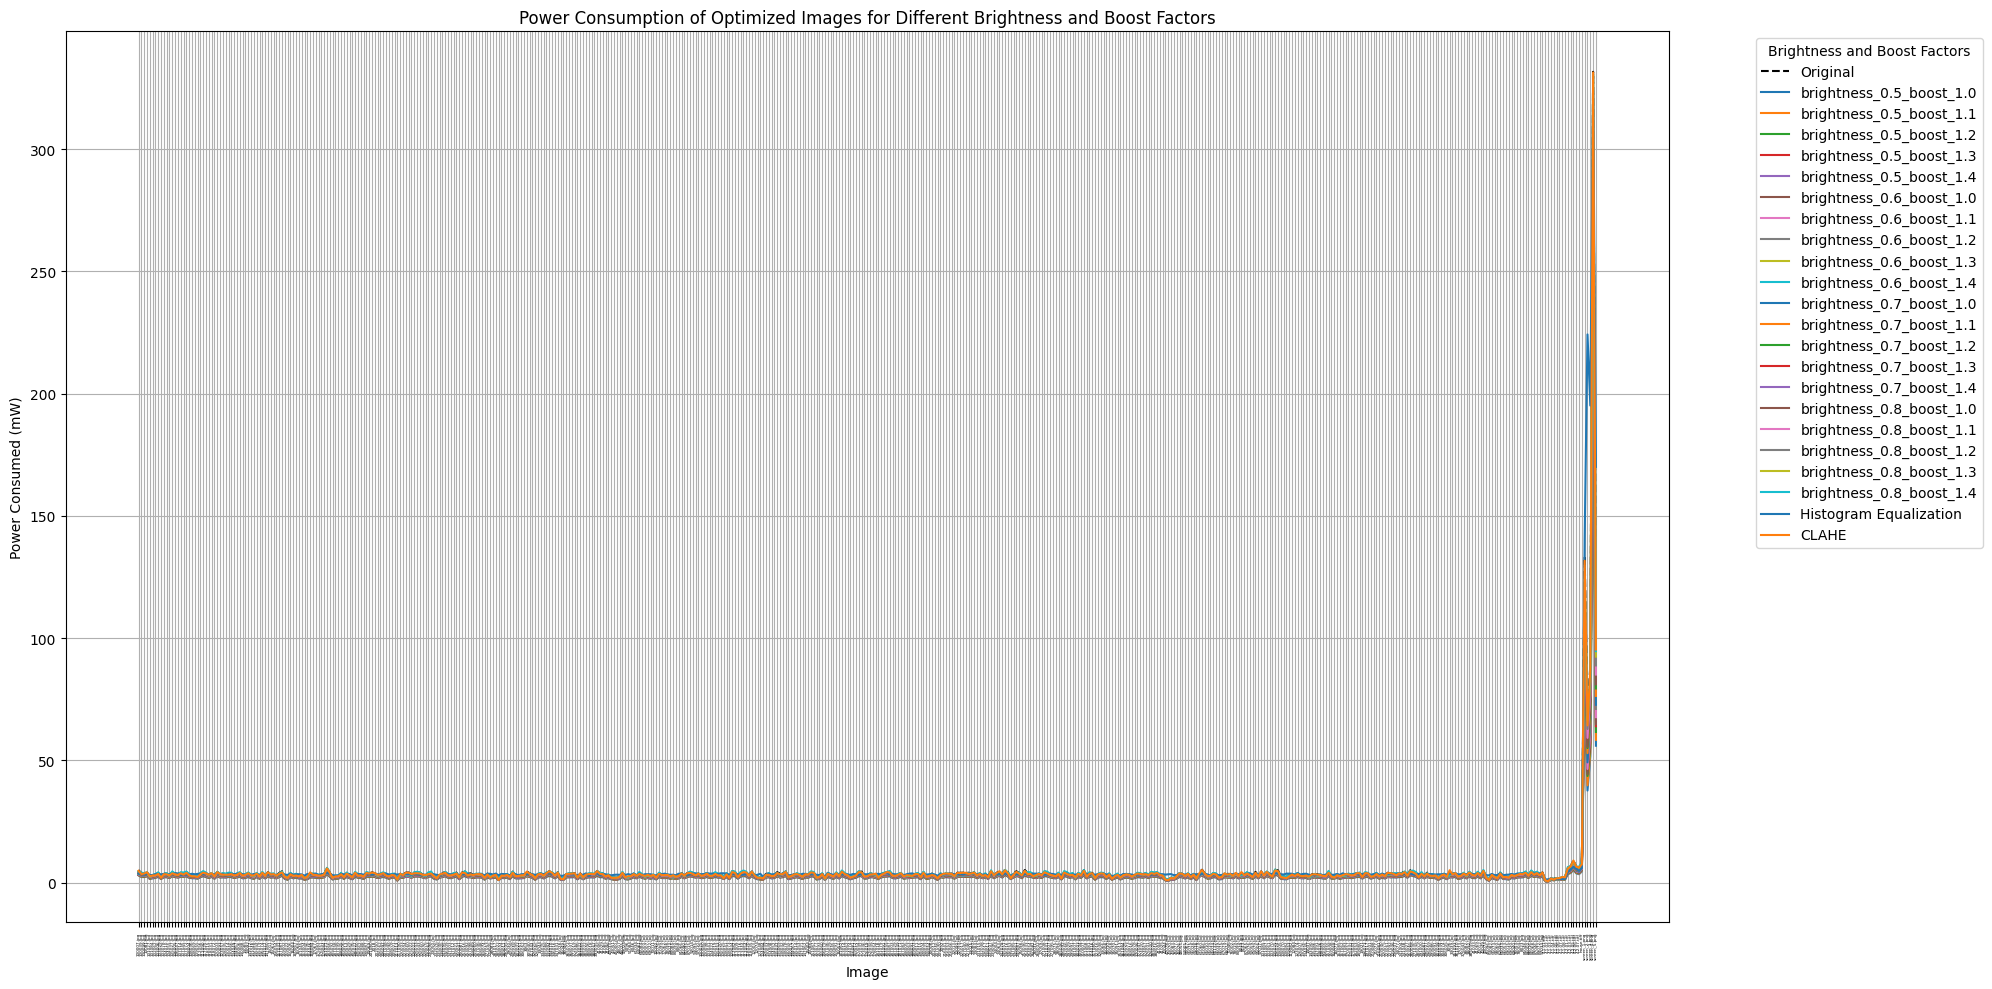

In [ ]:
"""
Plot a chart to visualize the power consumption of the optimized images for different brightness and boost factors.
"""

# File with the results of the analysis:
results_file_power = "power_consumption_results.csv"

# Read the results file into a pandas dataframe
df_results = pd.read_csv(results_file_power, sep="; ", engine='python')

# Extract the image names (without the full path)
df_results['Image'] = df_results['Image'].apply(lambda x: x.split('\\')[-1])

# Set the image names as the index
df_results.set_index('Image', inplace=True)

# Plot the data
plt.figure(figsize=(20, 10))
plt.plot(df_results.index, df_results['Original Power'], label='Original', linestyle='--', color='black')
for column in df_results.columns[1:]:
    plt.plot(df_results.index, df_results[column], label=column)

plt.xticks(ticks=range(len(df_results.index)), labels=df_results.index, rotation=90, fontsize=3)
plt.xlabel('Image')
plt.ylabel('Power Consumed (mW)')
plt.title('Power Consumption of Optimized Images for Different Brightness and Boost Factors')
plt.legend(title='Brightness and Boost Factors', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
"""
Utility to compute the average values of the power consumption for each transformation
"""

def compute_averages_from_file(results_file):
    # Read the results file into a pandas dataframe
    df_results = pd.read_csv(results_file, sep="; ", engine='python')
    
    # Compute the average power consumption for each transformation
    avg_power_consumption = {}
    for column in df_results.columns[1:]:
        ## Remove the lower and higher values before computing the average
        # sorted_values = df_results[column].sort_values()
        # trimmed_values = sorted_values[1:-1]  # Remove the first and last values
        # avg_power_consumption[column] = trimmed_values.mean()
        avg_power_consumption[column] = df_results[column].mean()   # Compute the average
    
    return avg_power_consumption



def test():
    results_file_power = "power_consumption_results.csv"
    averages = compute_averages_from_file(results_file_power)

    # Which of the trasformation in average consumes more power compared to the original one?
    avg_original = averages['Original Power']
    avg_less = {}
    avg_more = {}
    for key, value in averages.items():
        if value > avg_original:
            # print(f"{key} consumes more power than the original image on average.")
            avg_more.update({key: value})
        else:
            # print(f"{key} consumes less power than the original image on average.")
            avg_less.update({key: value})
    print("Transformations that consume less power than the original one on average:" , avg_less)
    print("Transformations that consume more power than the original one on average:" , avg_more)


# test()


From the previous cell I obtained that the transformation with a brightness = 0.8 and a boost factor = 1.4 is not worth it in terms of power consumptions. Also Histogram equalization consumes on average more power than the original image and the final images have an unnatural look.

The other trasformations are in average, an improvements in the power consumptions. I need to compute the distorsion to choose which technique has the lower PC and distorsion.


# Compute Distortion

In [29]:
# Compute distorsion

def compute_distortion_lab(original_image, modified_image):
  """
  Computes the distortion (and its percentage) between two images in the L*a*b* color space.

  Args:
    original_image: The original image (numpy array).
    modified_image: The distorted image (numpy array).

  Returns:
    The total distortion percentage.
  """

  # Convert images to Lab color space
  original_image_lab = rgb2lab(original_image)
  modified_image_lab = rgb2lab(modified_image)

  # Compute pixel-wise Euclidean distance in Lab space
  distortions = np.sqrt(
      np.sum((original_image_lab - modified_image_lab) ** 2, axis=2) 
  )

  # Sum all pixel distortions
  total_distortion = np.sum(distortions)
  
  if original_image_lab.shape != modified_image_lab.shape:
    raise ValueError("The original and modified images must have the same dimensions")
  

  w = original_image_lab.shape[0]
  h = original_image_lab.shape[1]
  max_distortion = math.sqrt(math.pow(100, 2) + math.pow(255, 2) + math.pow(255, 2)) 
  return (total_distortion / (w * h * max_distortion)) * 100

  # return total_distortion


def test():  
  original_image = Image.open("images/misc/4.2.05.tiff")
  distorted_image = Image.open("images/misc/darker_0.9/optimized_4.2.05.tiff")
  

  distortion_value = compute_distortion_lab(original_image, distorted_image)
  print(f"Distortion percentage: {distortion_value}") 

# test()


In [ ]:
"""
Utility to apply "compute_distortion_lab" to all the images in the directories
"""


# Output file to store the results of the distorsion:
results_file_power = "image_distorsion_results.csv"

all_images = get_image_paths()
brightness_range = np.arange(0.5, 0.9, 0.1) # Range of brightness values to test
boost_range = np.arange(1, 1.5, 0.1)  # Range of boost values to test

# Initialize the results file: write the header
with open(results_file_power, "w") as file:
    file.write("Image; ")
    for brightness in brightness_range:
        for boost in boost_range:
            file.write(f"brightness_{round(brightness,1)}_boost_{round(boost,1)}; ")
    file.write("Histogram Equalization; ")
    file.write("CLAHE")
    file.write("\n")



for image in all_images:
    original_img = Image.open(image)
    original_img_array = np.array(original_img)
    if original_img_array.shape[-1] == 4:  # Check if the image has an alpha channel
        original_img_array = original_img_array[..., :3]  # Remove the alpha channel. It is needed in the case of PNG images (screenshots).
            
    new_line = []
    leaf_modified_image = os.path.join(*image.split('\\')[1:])
    
    # Distortion for reduce_brightness_boost_non_blue function with different brightness and boost factors
    for brightness in brightness_range:  # Tune the brightness
        for boost in boost_range:  # Tune the boost factor for the non-blue pixels
            path_modified_image = f"processed_images_br{round(brightness,1)}_bo{round(boost,1)}\\{leaf_modified_image}"
            modified_img = Image.open(path_modified_image)
                   
            # Compute the distorsion between the original and the optimized image
            distortion_percentage = compute_distortion_lab(original_img_array, np.array(modified_img))
            new_line.append(f"{distortion_percentage}")
            
    # Distortion for histogram equalization
    path_modified_image = f"processed_images_eq_hist/{leaf_modified_image}"
    eq_img = Image.open(path_modified_image)
    distortion_percentage = compute_distortion_lab(original_img_array, np.array(eq_img))
    new_line.append(f"{distortion_percentage}")
    
    # Distortion for CLAHE
    path_modified_image = f"processed_images_CLAHE/{leaf_modified_image}"
    clahe_img = Image.open(path_modified_image)
    distortion_percentage = compute_distortion_lab(original_img_array, np.array(clahe_img))
    new_line.append(f"{distortion_percentage}")
    
    # Write the results to the file
    with open(results_file_power, "a") as file:
        file.write(f"{image}; {'; '.join(new_line)}\n")



# Plot the results into a chart avg distorsion vs avg power saved

{'Original Power': np.float64(4.687608372345613), 'brightness_0.5_boost_1.0': np.float64(2.72002802229602), 'brightness_0.5_boost_1.1': np.float64(2.8805064360557893), 'brightness_0.5_boost_1.2': np.float64(3.046867448514791), 'brightness_0.5_boost_1.3': np.float64(3.2023453989892423), 'brightness_0.5_boost_1.4': np.float64(3.3575340543598515), 'brightness_0.6_boost_1.0': np.float64(3.1349503497982), 'brightness_0.6_boost_1.1': np.float64(3.3216607166227594), 'brightness_0.6_boost_1.2': np.float64(3.5096149446114278), 'brightness_0.6_boost_1.3': np.float64(3.6893006920298994), 'brightness_0.6_boost_1.4': np.float64(3.873015477476869), 'brightness_0.7_boost_1.0': np.float64(3.531558733363418), 'brightness_0.7_boost_1.1': np.float64(3.747671587954764), 'brightness_0.7_boost_1.2': np.float64(3.954474004943268), 'brightness_0.7_boost_1.3': np.float64(4.162662287003041), 'brightness_0.7_boost_1.4': np.float64(4.36377782530026), 'brightness_0.8_boost_1.0': np.float64(3.926556663133558), 'bri

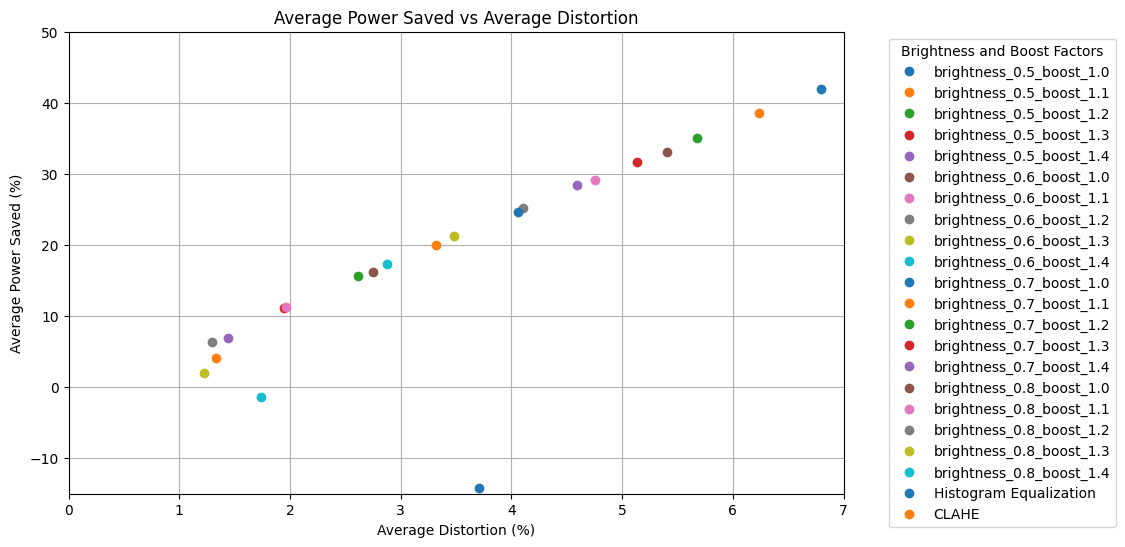

In [ ]:
# Compute the average power saved for each level of brightness
import matplotlib.pyplot as plt



results_file_power = "power_consumption_results.csv"
results_file_distorsion = "image_distorsion_results.csv"

average_power_consumption_DVS = compute_averages_from_file(results_file_power)
average_distortion_DVS = compute_averages_from_file(results_file_distorsion)

print(average_power_consumption_DVS)
print(average_distortion_DVS)



# Plot the results
plt.figure(figsize=(10, 6))
for column in average_power_consumption_DVS.keys():
    if column in average_distortion_DVS:
        power_saved_percentage = (average_power_consumption_DVS['Original Power'] - average_power_consumption_DVS[column]) / average_power_consumption_DVS['Original Power'] * 100
        print(f"Power saved for {column}: {power_saved_percentage:.2f}%")
        plt.plot(average_distortion_DVS[column], power_saved_percentage, 'o', label=f"{column}")


plt.legend(title='Brightness and Boost Factors', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Average Distortion (%)')
plt.ylabel('Average Power Saved (%)')
plt.title('Average Power Saved vs Average Distortion')
plt.grid(True)
# plt.xlim(0, max(average_distortion_blue.values()) + 1)
# plt.ylim(min(((average_power_consumption_blue['Original Power'] - np.array(list(average_power_consumption_blue.values())))/average_power_consumption_blue['Original Power'] * 100)) - 1, 10)
# plt.show()

plt.xlim(0,7)
plt.ylim(-15,50)
plt.show()


# For the analysis it's better to exclude the values that have an higher distorsion level and the one that consume more power compared to the original image.



As main constraints there are a positive power saved (avg) and a lower average distorsion. A maximum average distortion of the 4% is choosen.

- Both histogram equalization and brightness_0.8_boost_1.4 had negative power saved and despite the lower distorsion compared to other trasformations they can not be used for our goal.
- To save the most amount of power in average the techinques that can be choose are:
  - Set the brigthness to 60% and boost the non blue pixels with a factor of 1.4
  - CLAHE 

# DVS

The formula to compute the pixel current is given in the slides as:
$$
I_{cell} = \frac{p_1V_{dd}D_{RGB}}{255} + \frac{p_2D_{RGB}}{255} + p_3
$$


In [2]:
from PIL import Image
from typing import Tuple

def get_pixel_rgb(image: Image, x: int, y: int) -> Tuple[int, int, int]:
    """
    Retrieve the RGB value of a pixel from an image.
    :param image: The image from which to retrieve the pixel value.
    :param x: The x-coordinate of the pixel.
    :param y: The y-coordinate of the pixel.
    :return: the RGB value of the pixel.
    """
    return image.getpixel((x, y))
    

def compute_pixel_current(
        image: Image,
        x: int, 
        y: int,         
        vdd: float = 15,
        p1: float = 4.251e-5,
        p2: float = -3.029e-4,
        p3: float = 3.024e-5
    ) -> Tuple [float, float, float]:
    
    d_rgb = get_pixel_rgb(image, x, y)
    i_cell = tuple(
        (p1 * vdd * d / 255) + (p2 * d / 255) + p3
        for d in d_rgb
    )
    
    return i_cell   # tuple of 3 float values in mA

def test():
    all_images = get_image_paths()
    image = Image.open(all_images[0])
    
    # Test to retrieve the values of the RGB at x=10 and y=15
    print(f'RGB values: {get_pixel_rgb(image, 10, 15)}')
    
    # Test to compute the current values at x=10 and y=15
    print(f'Current values: {compute_pixel_current(image, 10, 15)} mA')

# test()

In [3]:
def compute_panel_power(
    image: Image, 
    vdd: float = 15,
    ):
    i_panel: float = 0
    for i in range(image.width):
        for j in range(image.height):
            i_cell_ij = compute_pixel_current(image, i, j, vdd)
            for k in range(3):
                i_panel += i_cell_ij[k]
                
    return vdd * i_panel    # in mW

def test():
    all_images = get_image_paths()
    image = Image.open(all_images[0])
    print(f'Panel power: {compute_panel_power(image)} mW')

# test()

In [4]:
from typing import Tuple
import numpy as np

def displayed_image(
        i_cell: np.ndarray,
        vdd: float,
        p1: float = 4.251e-5,
        p2: float = -3.029e-4,
        p3: float = 3.024e-5,
        orig_vdd: float = 15,
        ) -> Tuple[np.ndarray, np.ndarray]:
    """
    Display an image on the OLED display taking into account the effect of DVS.

    :param i_cell: An array of the currents drawn by each pixel of the display.
    :param vdd: The new voltage of the display.
    """
    i_cell_max = (p1 * vdd * 1) + (p2 * 1) + p3
    image_rgb_max = (i_cell_max - p3) / (p1 * orig_vdd + p2) * 255
    out = np.round((i_cell - p3) / (p1 * orig_vdd + p2) * 255)
    original_image = out.copy()

    # Clip the values exceeding `i_cell_max` to `image_rgb_max`
    out[i_cell > i_cell_max] = image_rgb_max

    return original_image.astype(np.uint8), out.astype(np.uint8)

In [ ]:
from scipy.io import loadmat

# Load the .mat file
mat_data = loadmat('sample_cell_current.mat')["I_cell_sample"]

# Inspect the loaded data
# print(f"Current: {(mat_data)}")
# print(f"Shape: {mat_data.shape}")
# print(f"Red channel:\n{mat_data[:, :, 0]}")
# print(f"Green channel:\n{mat_data[:, :, 1]}")
# print(f"Blue channel:\n{mat_data[:, :, 2]}")

image_array_orig, image_array_w_dvs = displayed_image(mat_data, 10) # From precompiled data
image_orig = Image.fromarray(image_array_orig)
image_orig.show()
image_w_dvs = Image.fromarray(image_array_w_dvs)
image_w_dvs.show()


In [15]:
def compute_panel_i(image: Image) -> np.ndarray:
    """
    Compute the current drawn by each pixel of the display.
    :param image: The image displayed on the OLED.
    :return: An array of the currents drawn by each pixel of the display.
    """
    # Initialize the array of currents
    panel_i = np.zeros((image.width, image.height, 3))
    image_array = np.array(image)
    if image_array.shape[-1] == 4:  # Check if the image has an alpha channel
        image_array = image_array[..., :3]  # Remove the alpha channel. It is needed in the case of PNG images (screenshots).
        image = Image.fromarray(image_array)
    
    # Iterate over each pixel of the image
    for x in range(image.width):
        for y in range(image.height):
            # Compute the current drawn by the pixel
            panel_i[x, y] = compute_pixel_current(image, x, y)
    
    return panel_i
    

def test():
    all_images = get_image_paths()
    image = Image.open(all_images[0])

    # The method to display the image needs the i_cell and a vdd value
    i_cell = compute_panel_i(image)
    vdd = 10 # New voltage value, under this value the test image is not visible 
    image_array_orig, image_array_w_dvs = displayed_image(i_cell, vdd) # From my data
    image_orig = Image.fromarray(image_array_orig)
    image_orig.show()
    image_w_dvs = Image.fromarray(image_array_w_dvs)
    image_w_dvs.show()
    
# test()


## Tune brightness

In [6]:
"""
Approach: Increase the brightness of the image

The function tune_brightness receives an image and the brightness_factor. 
The brightness_factor is used to boost (or lower) the brightness of the image. 
The function returns the modified image
"""

def tune_brightness(img, brightness_factor=1.0):
    """
    Works in LAB space
    """
    img_array = np.array(img)
    if img_array.shape[-1] == 4:  # Check if the image has an alpha channel
        img_array = img_array[..., :3]  # Remove the alpha channel. It is needed in the case of PNG images (screenshots).
    
    image_array_lab = rgb2lab(img_array)
    image_array_lab[:, :, 0] = np.clip(image_array_lab[:, :, 0] * brightness_factor, 0, 100)  # Increase the brightness in the L channel (limit to 100)

    return Image.fromarray((lab2rgb(image_array_lab) * 255).astype(np.uint8))

def test():
    all_images = get_image_paths()
    original_img = Image.open(all_images[0])
    original_img.show()
    o_img = tune_brightness(original_img, 1.3)

    print(compute_power(original_img))
    print(compute_power(o_img))

    o_img.show()

# test()

## Tune constrast

In [7]:

def increase_contrast(img, contrast_factor=1.0):
    """
    Increase the contrast of an image in the LAB color space.
    
    Args:
    img: input image.
    contrast_factor (float): The factor by which to increase the contrast. 
                             1.0 means no change, less than 1.0 decreases contrast, 
                             and greater than 1.0 increases contrast.
                             
    Returns:
    PIL.Image.Image: The image with increased contrast.
    """
    img_array = np.array(img)
    if img_array.shape[-1] == 4:  # Check if the image has an alpha channel
        img_array = img_array[..., :3]  # Remove the alpha channel. It is needed in the case of PNG images (screenshots).
    
    # Convert the image from RGB to LAB
    image_array_lab = rgb2lab(img_array)
    
    # Increase the contrast in the L channel
    l_channel = image_array_lab[:, :, 0]
    l_mean = np.mean(l_channel)
    image_array_lab[:, :, 0] = np.clip((l_channel - l_mean) * contrast_factor + l_mean, 0, 100)
    
    # Convert the modified LAB image back to RGB
    image_array_rgb = lab2rgb(image_array_lab)
    return Image.fromarray((image_array_rgb * 255).astype(np.uint8))


# Test the function
def test():
    all_images = get_image_paths()
    original_img = Image.open(all_images[0])
    original_img.show()
    contrast_img = increase_contrast(original_img, 1.5)
    contrast_img.show()

# test()

## Experiments:
In this section I will apply some transformations before applying DVS.
In this case there is another variable we can tune: V_dd.
The goal is to minimize the power consumption and maximize the perceived visual quality (subjective).
 

In [60]:
# Apply CLAHE transformation and then DVS to the image

# Load the image
all_images = get_image_paths()
image = Image.open(all_images[0])

# Apply CLAHE transformation
clahe_img = natural_clahe(image)

# Compute the current drawn by each pixel of the display
i_cell = compute_panel_i(clahe_img)

# Apply DVS with a new voltage value
vdd = 12  # New voltage value
image_array_orig, image_array_w_dvs = displayed_image(i_cell, vdd)


# Convert the arrays back to images and display them
image_orig = Image.fromarray(image_array_orig)
image_orig.show()
image_w_dvs = Image.fromarray(image_array_w_dvs)
# image_w_dvs.show()

print(compute_panel_power(image_orig))
print(compute_panel_power(image_w_dvs))

i_cell = compute_panel_i(tune_brightness(image, 1.2 ))
image_array_orig, image_array_w_dvs = displayed_image(i_cell, vdd)
image_w_dvs = Image.fromarray(image_array_w_dvs)
# image_w_dvs.show()
print(compute_panel_power(image_w_dvs))


i_cell = compute_panel_i(increase_contrast(image, 1.5 ))
image_array_orig, image_array_w_dvs = displayed_image(i_cell, vdd)
image_w_dvs = Image.fromarray(image_array_w_dvs)
image_w_dvs.show()
print(compute_panel_power(image_w_dvs))


# Combination of brightness and contrast:
# To have a final image with a good quality it's better to increase the contrast and decrease the brightness to avoid burned pixels.
i_cell = compute_panel_i(tune_brightness(increase_contrast(image, 1.5 ), 0.8 ))
image_array_orig, image_array_w_dvs = displayed_image(i_cell, vdd)
image_w_dvs = Image.fromarray(image_array_w_dvs)
image_w_dvs.show()
print(compute_panel_power(image_w_dvs))




1696.1235784614616
1453.375756496523
1516.840497026829
1424.229467820077
1359.0804622003527


The best results in terms of power saved and quality of the final image were achieved with the combination of increased contrast and lower brightness. In the next section I will apply those trasformations to all the dataset to compute the average power saved.

In [ ]:
"""
Loop over all images in the images folder and apply the trasformations defined before. 
Save the optimized images to a new folder "DVS" (named after the parameters used) and compute the power consumption of the optimized images. Write the results to a file.
In this way I can check if the quality of the image is acceptable and if the power consumption is reduced.
"""

# Output file to store the results:
results_file_power = "power_consumption_dvs_results.csv"

all_images = get_image_paths()
brightness_range = np.arange(0.7, 0.9, 0.1) # Range of brightness values to test
contrast_range = np.arange(1.1, 2, 0.1)  # Range of contrast values to test

# Initialize the results file
with open(results_file_power, "w") as file:
    file.write("Image; Original Power; ")
    for brightness in brightness_range:
        for contrast in contrast_range:
            file.write(f"brightness_{round(brightness,1)}_boost_{round(contrast,1)}; ")

    file.write("\n")    # End of the header


vdd = 12


all_images = all_images[-4:] # Pick the last four images



for image in all_images:
    original_img = Image.open(image)
    
    # original_power = compute_power(original_img)
    i_cell = compute_panel_i(original_img)
    image_array_orig, image_array_w_dvs = displayed_image(i_cell, vdd)
    image_w_dvs = Image.fromarray(image_array_w_dvs)
    original_power = compute_panel_power(image_w_dvs)
    new_line = []
    
    # TODO: tune also the voltage value (see the next section)
    
    # Apply the transformations with different brightness and contrast factors
    for brightness in brightness_range:  # Tune the brightness
        for contrast in contrast_range:  # Tune the boost factor for the non-blue pixels
            o_img = tune_brightness(increase_contrast(original_img, round(contrast,1) ), round(brightness,1) )
            # o_img = reduce_brightness_boost_non_blue(original_img, round(brightness,1), round(contrast,1))
            # Save the optimized image to a new folder
            new_image_path = image.replace("images", f"dvs_processed_images_br{round(brightness,1)}_cntr{round(contrast,1)}")
            new_image_dir = os.path.dirname(new_image_path)
            if not os.path.exists(new_image_dir):
                os.makedirs(new_image_dir)
            o_img.save(new_image_path)
            
            # Compute the current drawn by each pixel of the display
            i_cell = compute_panel_i(o_img)
            image_array_orig, image_array_w_dvs = displayed_image(i_cell, vdd)
            
            # Compute the power consumption of the optimized image
            image_w_dvs = Image.fromarray(image_array_w_dvs)
            # image_w_dvs.show() 
            optimized_power = compute_panel_power(image_w_dvs)
            new_line.append(f"{optimized_power}")
            
    # Write the results to the file
    with open(results_file_power, "a") as file:
        file.write(f"{image}; {original_power}; {'; '.join(new_line)}\n")

KeyboardInterrupt: 

In [ ]:
"""
This is a slightly modified version of the previous code.
In this case also the voltage value is tuned.
"""

output_file = "power_consumption_dvs_results_v2.csv"

all_images = get_image_paths()
brightness_range = np.arange(0.7, 0.9, 0.1) # Range of brightness values to test
contrast_range = np.arange(1.1, 2, 0.1)  # Range of contrast values to test
voltage_range = np.arange(12.0, 14, 0.5)  # Range of voltage values to test, from previous tests going over 13.5 is not useful in terms of power saving for the most cases (with those transformations).

# Initialize the results file
with open(output_file, "w") as file:
    file.write("Image; Original Power; ")
    for voltage in voltage_range:
        for brightness in brightness_range:
            for contrast in contrast_range:
                file.write(f"brightness_{round(brightness,1)}_contrast_{round(contrast,1)}_voltage_{round(voltage,1)}; ")

    file.write("\n")    # End of the header
    
all_images = all_images[-5:] # Pick the last five images

for image in all_images:
    original_img = Image.open(image)
    
    # original_power = compute_power(original_img)
    i_cell = compute_panel_i(original_img)
    image_array_orig, image_array_w_dvs = displayed_image(i_cell, vdd)
    image_w_dvs = Image.fromarray(image_array_w_dvs)
    original_power = compute_panel_power(image_w_dvs)
    new_line = []
    
    # Apply the transformations with different brightness and contrast factors
    for voltage in voltage_range:  # Tune the voltage value
        for brightness in brightness_range:  # Tune the brightness
            for contrast in contrast_range:  # Tune the contrast factor
                o_img = tune_brightness(increase_contrast(original_img, round(contrast,1) ), round(brightness,1) )
                # Save the optimized image to a new folder
                new_image_path = image.replace("images", f"dvs_processed_images_br{round(brightness,1)}_cntr{round(contrast,1)}_voltage{round(voltage,1)}")
                new_image_dir = os.path.dirname(new_image_path)
                if not os.path.exists(new_image_dir):
                    os.makedirs(new_image_dir)
                o_img.save(new_image_path)

                # Compute the current drawn by each pixel of the display
                i_cell = compute_panel_i(o_img)
                image_array_orig, image_array_w_dvs = displayed_image(i_cell, voltage)
                
                # Compute the power consumption of the optimized image
                image_w_dvs = Image.fromarray(image_array_w_dvs)
                # image_w_dvs.show() 
                optimized_power = compute_panel_power(image_w_dvs)
                new_line.append(f"{optimized_power}")
            
    # Write the results to the file
    with open(output_file, "a") as file:
        file.write(f"{image}; {original_power}; {'; '.join(new_line)}\n")


C:\Users\Diego\AppData\Local\Temp\ipykernel_8092\458462532.py:27: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 1 negative Z values that have been clipped to zero
  image_array_rgb = lab2rgb(image_array_lab)
C:\Users\Diego\AppData\Local\Temp\ipykernel_8092\458462532.py:27: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 26 negative Z values that have been clipped to zero
  image_array_rgb = lab2rgb(image_array_lab)
C:\Users\Diego\AppData\Local\Temp\ipykernel_8092\458462532.py:27: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 176 negative Z values that have been clipped to zero
  image_array_rgb = lab2rgb(image_array_lab)
C:\Users\Diego\AppData\Local\Temp\ipykernel_8092\458462532.py:27: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 296 negative Z values that have been clipped to zero
  image_array_rgb = lab2rgb(image_array_lab)
C:\Users\Diego\AppData\Local\Temp\i

KeyboardInterrupt: 

## Plot the results
In this section the results of the power consumptions obtained with DVS are plot. 

{'Original Power': np.float64(1080.0427658402095), 'brightness_0.7_contrast_1.1_voltage_12.0': np.float64(836.6906355489107), 'brightness_0.7_contrast_1.2_voltage_12.0': np.float64(836.1698659860361), 'brightness_0.7_contrast_1.3_voltage_12.0': np.float64(835.8609727759418), 'brightness_0.7_contrast_1.4_voltage_12.0': np.float64(835.5841071466874), 'brightness_0.7_contrast_1.5_voltage_12.0': np.float64(835.4427081034966), 'brightness_0.7_contrast_1.6_voltage_12.0': np.float64(835.5088010274993), 'brightness_0.7_contrast_1.7_voltage_12.0': np.float64(835.7563737176656), 'brightness_0.7_contrast_1.8_voltage_12.0': np.float64(836.1674831974268), 'brightness_0.7_contrast_1.9_voltage_12.0': np.float64(836.7246269135923), 'brightness_0.8_contrast_1.1_voltage_12.0': np.float64(919.1727518706832), 'brightness_0.8_contrast_1.2_voltage_12.0': np.float64(916.4448334832265), 'brightness_0.8_contrast_1.3_voltage_12.0': np.float64(914.0754769843409), 'brightness_0.8_contrast_1.4_voltage_12.0': np.fl

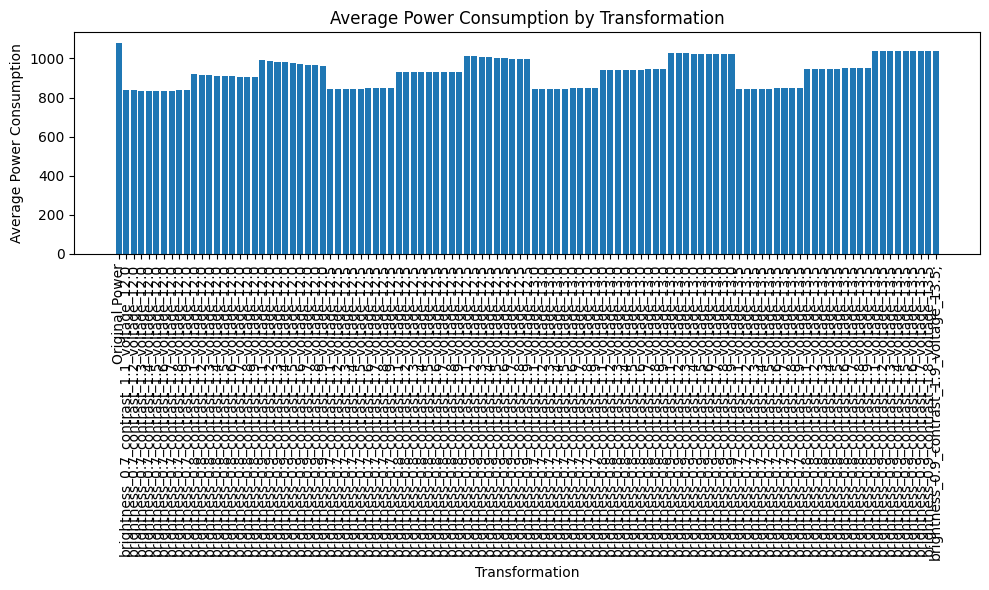

{
    "Original Power": 0.0,
    "brightness_0.7_contrast_1.1_voltage_12.0": 22.531712445847944,
    "brightness_0.7_contrast_1.2_voltage_12.0": 22.579929940501444,
    "brightness_0.7_contrast_1.3_voltage_12.0": 22.608530031151933,
    "brightness_0.7_contrast_1.4_voltage_12.0": 22.634164722481863,
    "brightness_0.7_contrast_1.5_voltage_12.0": 22.64725670806457,
    "brightness_0.7_contrast_1.6_voltage_12.0": 22.64113723519802,
    "brightness_0.7_contrast_1.7_voltage_12.0": 22.618214745645144,
    "brightness_0.7_contrast_1.8_voltage_12.0": 22.580150560340282,
    "brightness_0.7_contrast_1.9_voltage_12.0": 22.52856522189009,
    "brightness_0.8_contrast_1.1_voltage_12.0": 14.894781860270037,
    "brightness_0.8_contrast_1.2_voltage_12.0": 15.147356894679397,
    "brightness_0.8_contrast_1.3_voltage_12.0": 15.366733068829541,
    "brightness_0.8_contrast_1.4_voltage_12.0": 15.573570132754075,
    "brightness_0.8_contrast_1.5_voltage_12.0": 15.758678362987693,
    "brightness_0.8_co

In [ ]:
import json

# Compute the average power saved for each level of brightness

results_file_power = "power_consumption_dvs_results_v2.csv"

average_dvs_power_consumption = compute_averages_from_file(results_file_power)

print(average_dvs_power_consumption)

# Extracting transformations and their corresponding average power consumptions
transformations = list(average_dvs_power_consumption.keys())
average_power_consumptions = list(average_dvs_power_consumption.values())

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(transformations, average_power_consumptions)
plt.xlabel('Transformation')
plt.ylabel('Average Power Consumption')
plt.title('Average Power Consumption by Transformation')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Compute the average power saved for each transformation
avg_power_saved = {}

for key, value in average_dvs_power_consumption.items():
    avg_power_saved[key] = (average_dvs_power_consumption['Original Power'] - value) / average_dvs_power_consumption['Original Power'] * 100

print(json.dumps(avg_power_saved, indent=4))


The chart shows that, for a fixed voltage value (12V), all implemented techniques save in average more power compared to the original. However, only some of them achieved a quality of the final image that is comparable to the original.
For example with a b






In [ ]:
"""
Utility to apply "compute_distortion_lab" to all the images in the directories
"""


# Output file to store the results of the distorsion:
output_file = "image_distorsion_DVS_results.csv"

all_images = get_image_paths()
brightness_range = np.arange(0.7, 0.9, 0.1) # Range of brightness values to test
contrast_range = np.arange(1.1, 2, 0.1)  # Range of contrast values to test
voltage_range = np.arange(12.0, 14, 0.5)  # Range of voltage values to test, from previous tests going over 13.5 is not useful in terms of power saving for the most cases (with those transformations).


# Initialize the results file
with open(output_file, "w") as file:
    file.write("Image; ")
    for voltage in voltage_range:
        for brightness in brightness_range:
            for contrast in contrast_range:
                file.write(f"brightness_{round(brightness,1)}_contrast_{round(contrast,1)}_voltage_{round(voltage,1)}; ")

    file.write("\n")    # End of the header
    


for image in all_images:
    original_img = Image.open(image)
    original_img_array = np.array(original_img)
    if original_img_array.shape[-1] == 4:  # Check if the image has an alpha channel
        original_img_array = original_img_array[..., :3]  # Remove the alpha channel. It is needed in the case of PNG images (screenshots).
            
    new_line = []
    leaf_modified_image = os.path.join(*image.split('\\')[1:])
    

    # Distortion of different transformations
    for voltage in voltage_range:  # Tune the voltage value
        for brightness in brightness_range:  # Tune the brightness
            for contrast in contrast_range:  # Tune the contrast factor
                path_modified_image = f"dvs_processed_images_br{round(brightness,1)}_cntr{round(contrast,1)}_voltage{round(voltage,1)}\\{leaf_modified_image}"
                modified_img = Image.open(path_modified_image)
                    
                # Compute the distorsion between the original and the optimized image
                distortion_percentage = compute_distortion_lab(original_img_array, np.array(modified_img))
                new_line.append(f"{distortion_percentage}")
                
    
    # Write the results to the file
    with open(output_file, "a") as file:
        file.write(f"{image}; {'; '.join(new_line)}\n")


{'Original Power': np.float64(1080.0427658402095), 'brightness_0.7_contrast_1.1_voltage_12.0': np.float64(836.6906355489107), 'brightness_0.7_contrast_1.2_voltage_12.0': np.float64(836.1698659860361), 'brightness_0.7_contrast_1.3_voltage_12.0': np.float64(835.8609727759418), 'brightness_0.7_contrast_1.4_voltage_12.0': np.float64(835.5841071466874), 'brightness_0.7_contrast_1.5_voltage_12.0': np.float64(835.4427081034966), 'brightness_0.7_contrast_1.6_voltage_12.0': np.float64(835.5088010274993), 'brightness_0.7_contrast_1.7_voltage_12.0': np.float64(835.7563737176656), 'brightness_0.7_contrast_1.8_voltage_12.0': np.float64(836.1674831974268), 'brightness_0.7_contrast_1.9_voltage_12.0': np.float64(836.7246269135923), 'brightness_0.8_contrast_1.1_voltage_12.0': np.float64(919.1727518706832), 'brightness_0.8_contrast_1.2_voltage_12.0': np.float64(916.4448334832265), 'brightness_0.8_contrast_1.3_voltage_12.0': np.float64(914.0754769843409), 'brightness_0.8_contrast_1.4_voltage_12.0': np.fl

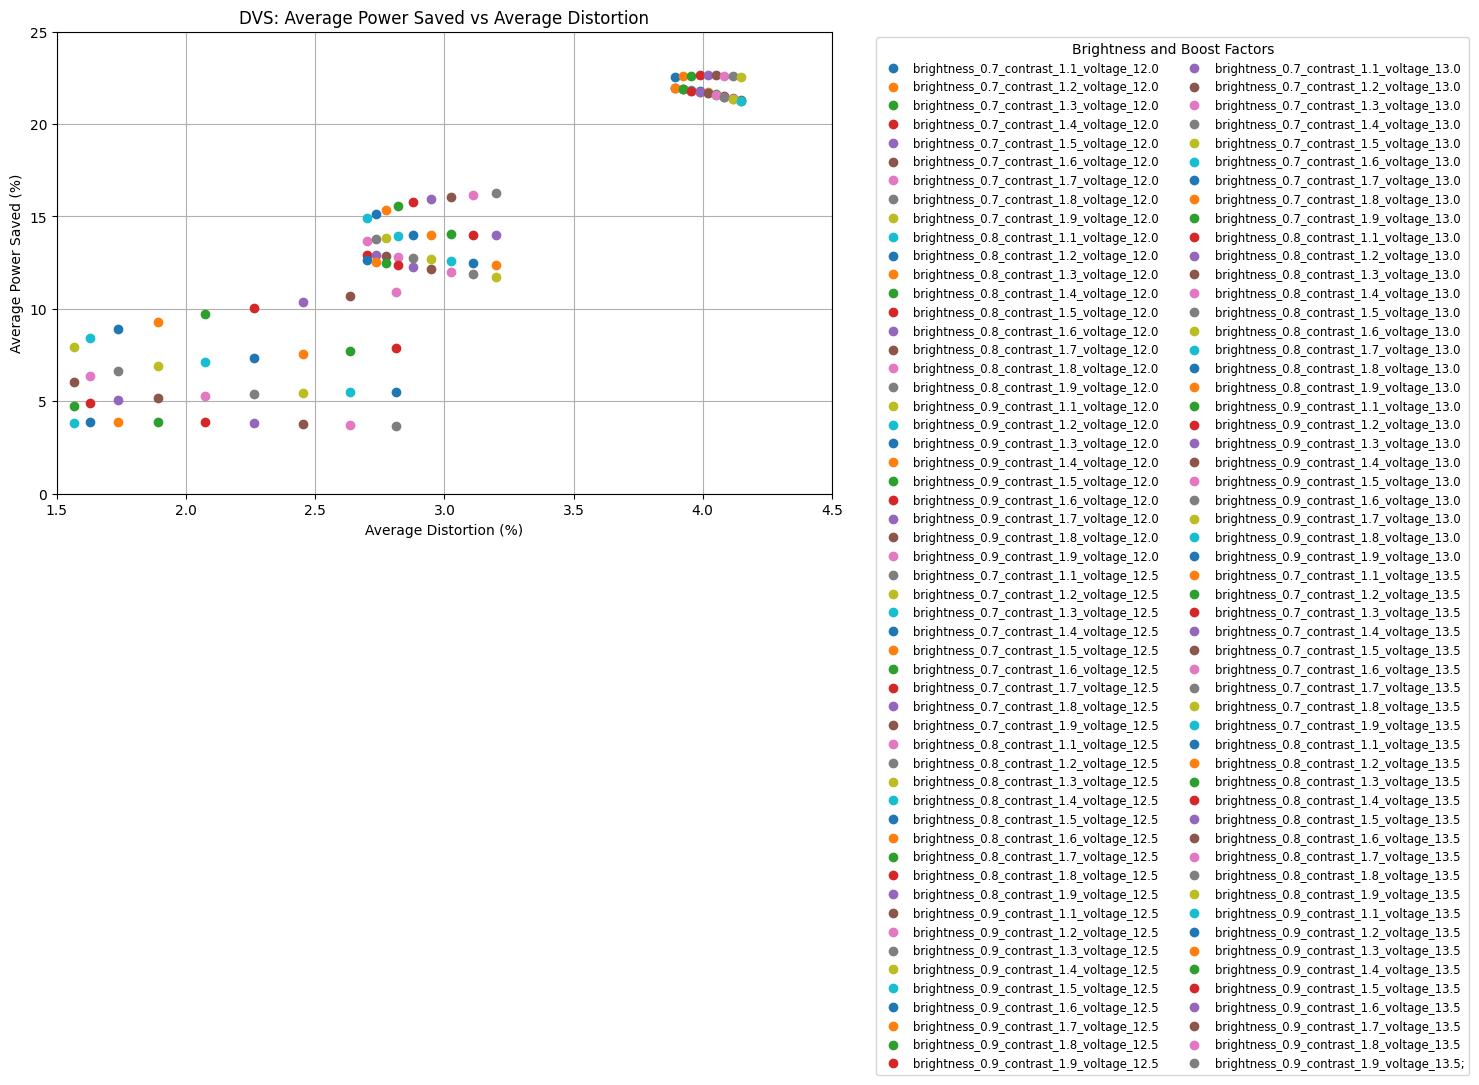

In [ ]:
# Compute the average power saved for each level of brightness
import matplotlib.pyplot as plt



results_file_power = "power_consumption_dvs_results_v2.csv"
results_file_distorsion = "image_distorsion_DVS_results.csv"

average_power_consumption_DVS = compute_averages_from_file(results_file_power)
average_distortion_DVS = compute_averages_from_file(results_file_distorsion)

print(average_power_consumption_DVS)
print(average_distortion_DVS)
# print(f"Distortion {column}: {average_distortion_DVS:.2f}%")


# # Filter the results to exclude the values that have an higher distorsion level and the one that consume more power compared to the original image.
# for key, value in average_distortion_DVS.items():
    


# Plot the results
plt.figure(figsize=(10, 6))
for column in average_power_consumption_DVS.keys():
    if column in average_distortion_DVS:
        power_saved_percentage = (average_power_consumption_DVS['Original Power'] - average_power_consumption_DVS[column]) / average_power_consumption_DVS['Original Power'] * 100
        print(f"Power saved for {column}: {power_saved_percentage:.2f}%, Distortion: {average_distortion_DVS[column]:.2f}%")
        plt.plot(average_distortion_DVS[column], power_saved_percentage, 'o', label=f"{column}")


plt.legend(title='Brightness and Boost Factors', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', ncol=2)
plt.xlabel('Average Distortion (%)')
plt.ylabel('Average Power Saved (%)')
plt.title('DVS: Average Power Saved vs Average Distortion')
plt.grid(True)
# plt.xlim(0, max(average_distortion_blue.values()) + 1)
# plt.ylim(min(((average_power_consumption_blue['Original Power'] - np.array(list(average_power_consumption_blue.values())))/average_power_consumption_blue['Original Power'] * 100)) - 1, 10)
# plt.show()

plt.xlim(1.5,4.5)
plt.ylim(0,25)
plt.show()


# For the analysis it's better to exclude the values that have an higher distorsion level and the one that consume more power compared to the original image.

## Analysis:
Brightness 0.7, Contrast 1.5, Voltage 12.0 strikes the optimal balance for most use cases, achieving near-maximal power savings while staying within acceptable distortion limits (I choose a maximum distortion of 4%).

